In [ ]:
(1 балл) Напишите программу для пошагового построения бинарного дерева поиска (элементы добавляются в дерево по одному в порядке поступления). Продемонстрируйте работу программы для массива чисел: [5, 1, 10, 7, 8, 11, 3]
Постройте график зависимости среднего времени работы от длины случайного входа.


In [67]:
from random import randint


class Node:

    def __init__(self, data):
        self.parent = None
        self.left = None
        self.right = None
        self.value = data
        #print(data)
  
          
class Tree:
    def __init__(self):
        self.root = None
        
    def kill_tree(self):
        self.root = None

    def get_root(self):
        return self.root
    
    def length(self):
        return self.size

    def add_node(self, data):
        node = self.root
        #print("Node is", node)
        if node == None:
            #print("Tree is empty!")
            self.root = Node(data)
        else:
            self._add(node, data)
            #print(node, data)
                    
    def _add(self, node, data):
        #print(node, data)
        if data < node.value:
            if node.left != None:
                self._add(node.left, data)
            else:
                node.left = Node(data)
                #print(node.left.value)
        if data == node.value:
            return -1
        if data > node.value:
            if node.right != None:
                self._add(node.right, data)
            else:
                node.right = Node(data)
                #print(node.right.value)


    def search(self, data):
        node = self.root
        while node != None:
            if node.value == data:
                return node
            if node.value > data:
                node = node.left
            else:
                node = node.right
        return None
            
    def __repr__(self):
        self.sorted = []
        self.get_inorder(self.root)
        return str(self.sorted)

    def get_inorder(self, node):
        if node:
            self.get_inorder(node.left)
            self.sorted.append(str(node.value))
            self.get_inorder(node.right)

import numpy as np
import time
import random
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.setrecursionlimit = 10**3 #in case you use bigger test set 

test = [list(range(n)) for n in range(0, 2000, 10)] 
#print(test)
lengthes = []
avg_times = []
for x in test:
    #print(x)
    tree = Tree()
    all_times = []
    for elm in range(len(x)+1):
        rand = randint(elm, len(x))
        #print(rand)
        start = time.time()
        tree.add_node(rand)
        end = time.time()
        all_times.append(end-start)
    tree.kill_tree()
    lengthes.append(len(x))
    avg_times.append(np.mean(all_times))

In [ ]:
tree = Tree()
for elm in range(100):
        rand = randint(elm, 100)
        #print(rand)
        tree.add_node(rand)
print(tree)

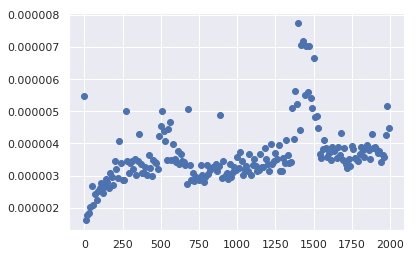

In [69]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd

x, y = lengthes, avg_times
plt.plot(x, y, "bo")
plt.show()

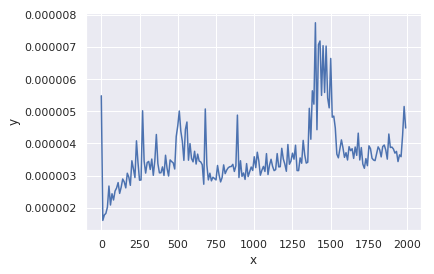

In [71]:
ax = sns.lineplot(x="x", y="y", data=df)

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd

data_tuples = list(zip(x,y))
df = pd.DataFrame(data_tuples, columns=['x','y'])

ax = sns.scatterplot(x="x", y="y", data=df)

In [ ]:
(2 балла) Реализуйте удаление элемента из бинарного дерева поиска. Удалите из примера в прошлом задании элемент 10. Постройте график зависимости среднего времени работы от размера дерева.


In [74]:
from random import randint


class Node:

    def __init__(self, data):
        self.parent = None
        self.left = None
        self.right = None
        self.value = data
        #print(data)
  
          
class Tree:
    def __init__(self):
        self.root = None
     
    
    def kill_tree(self):
        self.root = None

        
    def get_root(self):
        return self.root
    
    
    def length(self):
        return self.size

    
    def add_node(self, data):
        node = self.root
        #print("Node is", node)
        if node == None:
            #print("Tree is empty!")
            self.root = Node(data)
            self.root.parent = None
        else:
            self._add(node, data)
            #print(node.value, data)
      
    
    def _add(self, node, data):
        #print(node.value, data)
        if data < node.value:
            if node.left != None:
                self._add(node.left, data)
            else:
                node.left = Node(data)
                node.left.parent = node
                #print(node.left.value)
        if data == node.value:
            return -1
        if data > node.value:
            if node.right != None:
                self._add(node.right, data)
            else:
                node.right = Node(data)
                node.right.parent = node
                #print(node.right.value)


    def search(self, data):
        node = self.root
        while node != None:
            if node.value == data:
                #print(node.value)
                return node
            if node.value > data:
                node = node.left
            else:
                node = node.right
        #print("Node not found!")
        return -1
      
        
    def __repr__(self):
        self.sorted = []
        self.get_inorder(self.root)
        return str(self.sorted)

    
    def get_inorder(self, node):
        if node:
            self.get_inorder(node.left)
            self.sorted.append(str(node.value))
            self.get_inorder(node.right)
    
    
    def delete_node(self, data):
        
        if self.root == None:
            #print("Tree is empty!")
            return -1
        
        elif self.root.value == data:
            self.kill_tree()

        else:
            r_node = self.root
            #print("root is", r_node.value)
            node = self.search(data)
            #print(node.value)
            
            if (node.left == None) and (node.right == None):
                #print(1, node.value)
                #print(2, node.parent.value)
                #print(3, node.parent.right.value)
                
                if node.parent.right == node:
                    node.parent.right = None
                else:
                    node.parent.left = None
    
            elif (node.left == None) or (node.right == None):
                if node.left == None:
                    if node.parent.right == node:
                        node.parent.right = node.right
                    else:
                        node.parent.left = node.right
                if node.right == None:
                    #print(node.parent.value)
                    #print(node.left.value)
                    if node.parent.right == node:
                        node.parent.right = node.left
                    else:
                        node.parent.left = node.left
    
    
            else:
                if self.find_min(node.right) == node.right:
                    node.value = node.right.value
                    node.right = None
                else:
                    min_node = self.find_min(node.right)
                    temp = min_node.value
                    #print(temp)
                    self.delete_node(temp)
                    node.value = temp
                

    def find_min(self, node):
        if self.root == None:
            #print("Tree is empty!")
            return -1
        else:
            while node.left != None:
                node = node.left
                #print(node.value)
            #print(node.value)
            return node
        
        
    def isRightChild(self, node):
        if node.parent.right == node:
            return True
        else:
            return False
        
        
    def isLeftChild(self, node):
        if node.parent.left == node:
            return True
        else:
            return False
    
    def isRoot(self, node):
        if node == self.get_root():
            return True
        else:
            return False
        
        
    def rotateLeft(self, rotRoot):
        newRoot = rotRoot.right
        print(newRoot.value)
        rotRoot.right = newRoot.left
        print(rotRoot.right.value)
        print(newRoot.left.value)
        if newRoot.left != None:
            newRoot.left.parent = rotRoot
        newRoot.parent = rotRoot.parent
        if self.isRoot(rotRoot):
            self.root = newRoot
        else:
            if self.isLeftChild(rotRoot):
                rotRoot.parent.left = newRoot
            else:
                rotRoot.parent.right = newRoot
        newRoot.left = rotRoot
        rotRoot.parent = newRoot
    
    
    def rotateRight(self, rotRoot):
        newRoot = rotRoot.left
        rotRoot.left = newRoot.right
        print(newRoot.value)
        if newRoot.right != None:
            newRoot.right.parent = rotRoot
        newRoot.parent = rotRoot.parent
        if self.isRoot(rotRoot):
            self.root = newRoot
        else:
            if self.isRightChild(rotRoot):
                rotRoot.parent.right = newRoot
            else:
                rotRoot.parent.left = newRoot
        newRoot.right = rotRoot
        rotRoot.parent = newRoot


In [50]:
tree = Tree()
tree.add_node(7)
#print(tree)
tree.add_node(3)
#print(tree)
tree.add_node(9)
#print(tree)
tree.add_node(8)
#print(tree)
tree.add_node(2)
#print(tree)
tree.add_node(6)
#print(tree)
tree.add_node(1)
#print(tree)
tree.add_node(5)
#print(tree)
tree.add_node(4)
tree.add_node(1)
tree.add_node(1)
tree.add_node(1)


print(tree)

#tree.find_min(tree.get_root().right)
#print(0, tree.search(8).parent.value)
tree.delete_node(8)
print(tree)
tree.delete_node(1)
print(tree)
tree.delete_node(6)
print(tree)
tree.delete_node(4)
print(tree)
tree.delete_node(5)
print(tree)
tree.delete_node(3)
print(tree)

['1', '2', '3', '4', '5', '6', '7', '8', '9']
['1', '2', '3', '4', '5', '6', '7', '9']
['2', '3', '4', '5', '6', '7', '9']
['2', '3', '4', '5', '7', '9']
['2', '3', '5', '7', '9']
['2', '3', '5', '7', '9']
['2', '5', '7', '9']


In [106]:
import numpy as np
import time
import random
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.setrecursionlimit = 10**3 #in case you use bigger test set 

test = [list(range(n)) for n in range(100, 100000, 1000)] 
#print(test)
lengthes = []
avg_times = []
for x in test:
    #print(x)
    tree = Tree()
    all_times = []
    for elm in range(len(x)+1):
        tree.add_node(10)
        rand = randint(elm, len(x))
        #print(rand)
        tree.add_node(rand)
    start = time.time()
    tree.delete_node(10)
    end = time.time()
    all_times.append(end-start)
    tree.kill_tree()
    lengthes.append(len(x))
    avg_times.append(np.mean(all_times))

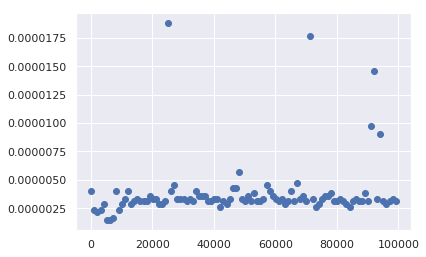

In [107]:
c, f = lengthes, avg_times
plt.plot(c, f, "bo")
plt.show()

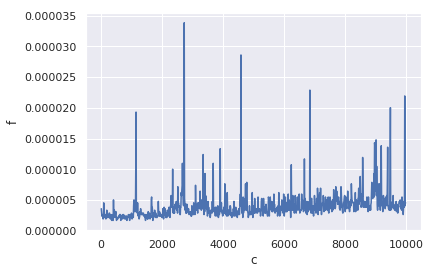

In [108]:
ax = sns.lineplot(x="c", y="f", data=df)

In [ ]:
(1 балл) Напишите правое и левое вращения узла бинарного дерева поиска. Продемонстрируйте их работу.


In [20]:
from random import randint


class Node:

    def __init__(self, data):
        self.parent = None
        self.left = None
        self.right = None
        self.value = data
        #print(data)
  
          
class Tree:
    def __init__(self):
        self.root = None
     
    
    def kill_tree(self):
        self.root = None

        
    def get_root(self):
        return self.root
    
    
    def length(self):
        return self.size

    
    def add_node(self, data):
        node = self.root
        #print("Node is", node)
        if node == None:
            #print("Tree is empty!")
            self.root = Node(data)
            self.root.parent = None
        else:
            self._add(node, data)
            #print(node.value, data)
      
    
    def _add(self, node, data):
        #print(node.value, data)
        if data < node.value:
            if node.left != None:
                self._add(node.left, data)
            else:
                node.left = Node(data)
                node.left.parent = node
                #print(node.left.value)
        if data == node.value:
            return -1
        if data > node.value:
            if node.right != None:
                self._add(node.right, data)
            else:
                node.right = Node(data)
                node.right.parent = node
                #print(node.right.value)


    def search(self, data):
        node = self.root
        while node != None:
            if node.value == data:
                #print(node.value)
                return node
            if node.value > data:
                node = node.left
            else:
                node = node.right
        #print("Node not found!")
        return -1
      
        
    def __repr__(self):
        self.sorted = []
        self.get_inorder(self.root)
        return str(self.sorted)

    
    def get_inorder(self, node):
        if node:
            self.get_inorder(node.left)
            self.sorted.append(str(node.value))
            self.get_inorder(node.right)
    
    
    def delete_node(self, data):
        
        if self.root == None:
            #print("Tree is empty!")
            return -1
        
        elif self.root.value == data:
            self.kill_tree()

        else:
            r_node = self.root
            #print("root is", r_node.value)
            node = self.search(data)
            #print(node.value)
            
            if (node.left == None) and (node.right == None):
                #print(1, node.value)
                #print(2, node.parent.value)
                #print(3, node.parent.right.value)
                
                if node.parent.right == node:
                    node.parent.right = None
                else:
                    node.parent.left = None
    
            elif (node.left == None) or (node.right == None):
                if node.left == None:
                    if node.parent.right == node:
                        node.parent.right = node.right
                    else:
                        node.parent.left = node.right
                if node.right == None:
                    #print(node.parent.value)
                    #print(node.left.value)
                    if node.parent.right == node:
                        node.parent.right = node.left
                    else:
                        node.parent.left = node.left
    
    
            else:
                if self.find_min(node.right) == node.right:
                    node.value = node.right.value
                    node.right = None
                else:
                    min_node = self.find_min(node.right)
                    temp = min_node.value
                    #print(temp)
                    self.delete_node(temp)
                    node.value = temp
                

    def find_min(self, node):
        if self.root == None:
            #print("Tree is empty!")
            return -1
        else:
            while node.left != None:
                node = node.left
                #print(node.value)
            #print(node.value)
            return node
        
        
    def isRightChild(self, node):
        if node.parent.right == node:
            return True
        else:
            return False
        
        
    def isLeftChild(self, node):
        if node.parent.left == node:
            return True
        else:
            return False
    
    def isRoot(self, node):
        if node == self.get_root():
            return True
        else:
            return False
        
        
    def rotateLeft(self, rotRoot):
        newRoot = rotRoot.right
        print(newRoot.value)
        rotRoot.right = newRoot.left
        print(rotRoot.right.value)
        print(newRoot.left.value)
        if newRoot.left != None:
            newRoot.left.parent = rotRoot
        newRoot.parent = rotRoot.parent
        if self.isRoot(rotRoot):
            self.root = newRoot
        else:
            if self.isLeftChild(rotRoot):
                rotRoot.parent.left = newRoot
            else:
                rotRoot.parent.right = newRoot
        newRoot.left = rotRoot
        rotRoot.parent = newRoot
    
    
    def rotateRight(self, rotRoot):
        newRoot = rotRoot.left
        rotRoot.left = newRoot.right
        print(newRoot.value)
        if newRoot.right != None:
            newRoot.right.parent = rotRoot
        newRoot.parent = rotRoot.parent
        if self.isRoot(rotRoot):
            self.root = newRoot
        else:
            if self.isRightChild(rotRoot):
                rotRoot.parent.right = newRoot
            else:
                rotRoot.parent.left = newRoot
        newRoot.right = rotRoot
        rotRoot.parent = newRoot
        
    def print_a_tree(self, node):
        if node:
            l = self.length_node(node)
            #print(l)
            v = str(node.value)
            print(v.center(l*2, " "))
            self.print_a_tree(node.left)
            self.print_a_tree(node.right)

            
    def length_node(self, node):
        self.sorted = []
        self.get_inorder(node)
        #print(self.sorted)
        return len(self.sorted)


tree = Tree()
tree.add_node(7)
#print(tree)
tree.add_node(3)
#print(tree)
tree.add_node(9)
#print(tree)
tree.add_node(8)
#print(tree)
tree.add_node(2)
#print(tree)
tree.add_node(6)
#print(tree)
tree.add_node(1)
#print(tree)
tree.add_node(5)
#print(tree)
tree.add_node(4)
tree.add_node(1)
tree.add_node(1)
tree.add_node(1)

print(tree)

print(tree.print_a_tree(tree.get_root()))


tree.rotateLeft(tree.search(7))
print(tree)
print("root is",tree.get_root().value)

print(tree.print_a_tree(tree.get_root()))


tree.rotateRight(tree.search(9))
print(tree)
print("root is",tree.get_root().value)

print(tree.print_a_tree(tree.get_root()))


tree.rotateRight(tree.search(7))
print(tree)
print("root is", tree.get_root().value)

print(tree.print_a_tree(tree.get_root()))


['1', '2', '3', '4', '5', '6', '7', '8', '9']
        7         
     3      
 2  
1 
  6   
 5  
4 
 9  
8 
None
9
8
8
['1', '2', '3', '4', '5', '6', '7', '8', '9']
root is 9
        9         
       7        
     3      
 2  
1 
  6   
 5  
4 
8 
None
7
['1', '2', '3', '4', '5', '6', '7', '8', '9']
root is 7
        7         
     3      
 2  
1 
  6   
 5  
4 
 9  
8 
None
3
['1', '2', '3', '4', '5', '6', '7', '8', '9']
root is 3
        3         
 2  
1 
     7      
  6   
 5  
4 
 9  
8 
None


In [354]:
from binarytree import tree
t = tree()
print(t)


         _____3__
        /        \
    ___1___       5___
   /       \     /    \
  11       _0   7     _10
 /  \     /          /
6    9   14         13



In [ ]:
(2 балл) Файл содержит набор действительных чисел. Напишите программу, которая позволяет пользователю многократно вводить пары чисел a и b (a<b), при этом в ответ программа выводит сначала все числа меньше a, затем все числа между a и b, и наконец больше b. Файл можно читать один раз. Использовать дополнительные списки для промежуточного хранения данных нельзя.

In [21]:
from random import randint
def get_list(alist, a, b, node):
    if node:
        if int(node.value) > a and int(node.value) < b:
            alist.append(str(node.value))
        get_list(alist, a, b, node.left)
        get_list(alist, a, b, node.right)
        

with open("out_file.txt", "w") as f:
    for elm in range(1000):
        rand = randint(elm, 1000)
        #print(rand)
        f.write(str(rand) + "\t")
        
with open("out_file.txt", "r") as f:
    l = f.read().strip().split("\t")
    #print(l)
    tree = Tree()
    for i in l:
        tree.add_node(i)
    #print(tree)
    a = int()
    b = int()
    while a >= b:
        a = int(input("Type a "))
        b = int(input("Type b "))
        print(a, b)
    alist = []
    get_list(alist, a, b, tree.get_root())
    print(alist)
    
    

Type a 2
Type b 5
2 5
[]


In [ ]:
(2 балла) Напишите добавление элемента в случайное дерево поиска. Постройте график зависимости среднего времени построения дерева от длины списка. Постройте распределение высот получаемых деревьев. 


In [21]:
from random import randint
import random


class Node:

    def __init__(self, data):
        self.parent = None
        self.left = None
        self.right = None
        self.value = data
        #print(data)
  
          
class Tree:
    def __init__(self):
        self.root = None
     
    
    def kill_tree(self):
        self.root = None

        
    def get_root(self):
        return self.root
    
    
    def length(self):
        return self.size

    
    def add_node(self, data):
        node = self.root
        print("Node is", node)
        if node == None:
            print("Tree is empty!")
            self.root = Node(data)
            self.root.parent = None
        else:
            print("root 1 is", tree.get_root().value)
            #print(node)
            node = self._add(node, data)
            #print(node)
            print(node.parent, data)
            print("root 2 is", tree.get_root().value)
            
            r = random.uniform(0, 1)
            if r < 1/(self.length_node(self.root)+1):
                while node.parent != None:
                    print("!!!!",node.parent)
                    #print(node.value)
                    if node.parent.right == node:
                        self.rotateRight(node)
                    else:
                        self.rotateLeft(node)
                #print(tree)
                #print("root is", tree.get_root().value)

                #print(tree.print_a_tree(tree.get_root()))

                #print("End!")
    
    def _add(self, node, data):
        #print(node.value, data)
        if data < node.value:
            if node.left != None:
                self._add(node.left, data)
            else:
                node.left = Node(data)
                node.left.parent = node
                #print(node.left.value)
        if data == node.value:
            return -1
        if data > node.value:
            if node.right != None:
                self._add(node.right, data)
            else:
                node.right = Node(data)
                node.right.parent = node
                #print(node.right.value)
        return node

    def search(self, data):
        node = self.root
        while node != None:
            if node.value == data:
                #print(node.value)
                return node
            if node.value > data:
                node = node.left
            else:
                node = node.right
        #print("Node not found!")
        return -1
      
        
    def __repr__(self):
        self.sorted = []
        self.get_inorder(self.root)
        return str(self.sorted)

    
    def get_inorder(self, node):
        if node:
            self.get_inorder(node.left)
            self.sorted.append(str(node.value))
            self.get_inorder(node.right)
    
    
    def delete_node(self, data):
        
        if self.root == None:
            #print("Tree is empty!")
            return -1
        
        elif self.root.value == data:
            self.kill_tree()

        else:
            r_node = self.root
            #print("root is", r_node.value)
            node = self.search(data)
            #print(node.value)
            
            if (node.left == None) and (node.right == None):
                #print(1, node.value)
                #print(2, node.parent.value)
                #print(3, node.parent.right.value)
                
                if node.parent.right == node:
                    node.parent.right = None
                else:
                    node.parent.left = None
    
            elif (node.left == None) or (node.right == None):
                if node.left == None:
                    if node.parent.right == node:
                        node.parent.right = node.right
                    else:
                        node.parent.left = node.right
                if node.right == None:
                    #print(node.parent.value)
                    #print(node.left.value)
                    if node.parent.right == node:
                        node.parent.right = node.left
                    else:
                        node.parent.left = node.left
    
    
            else:
                if self.find_min(node.right) == node.right:
                    node.value = node.right.value
                    node.right = None
                else:
                    min_node = self.find_min(node.right)
                    temp = min_node.value
                    #print(temp)
                    self.delete_node(temp)
                    node.value = temp
                

    def find_min(self, node):
        if self.root == None:
            #print("Tree is empty!")
            return -1
        else:
            while node.left != None:
                node = node.left
                #print(node.value)
            #print(node.value)
            return node
        
        
    def isRightChild(self, node):
        if node.parent.right == node:
            return True
        else:
            return False
        
        
    def isLeftChild(self, node):
        if node.parent.left == node:
            return True
        else:
            return False
    
    def isRoot(self, node):
        if node == self.get_root():
            return True
        else:
            return False
        
        
    def rotateLeft(self, rotRoot):
        newRoot = rotRoot.right
        print(newRoot.value)
        rotRoot.right = newRoot.left
        print(rotRoot.right.value)
        print(newRoot.left.value)
        if newRoot.left != None:
            newRoot.left.parent = rotRoot
        newRoot.parent = rotRoot.parent
        if self.isRoot(rotRoot):
            self.root = newRoot
        else:
            if self.isLeftChild(rotRoot):
                rotRoot.parent.left = newRoot
            else:
                rotRoot.parent.right = newRoot
        newRoot.left = rotRoot
        rotRoot.parent = newRoot
    
    
    def rotateRight(self, rotRoot):
        newRoot = rotRoot.left
        rotRoot.left = newRoot.right
        print(newRoot.value)
        if newRoot.right != None:
            newRoot.right.parent = rotRoot
        newRoot.parent = rotRoot.parent
        if self.isRoot(rotRoot):
            self.root = newRoot
        else:
            if self.isRightChild(rotRoot):
                rotRoot.parent.right = newRoot
            else:
                rotRoot.parent.left = newRoot
        newRoot.right = rotRoot
        rotRoot.parent = newRoot

    def print_a_tree(self, node):
        if node:
            l = self.length_node(node)
            #print(l)
            v = str(node.value)
            print(v.center(l*2, " "))
            self.print_a_tree(node.left)
            self.print_a_tree(node.right)

            
    def length_node(self, node):
        self.sorted = []
        self.get_inorder(node)
        #print(self.sorted)
        return len(self.sorted)


In [81]:
from random import randint
import random


class Node:

    def __init__(self, data):
        self.parent = None
        self.left = None
        self.right = None
        self.value = data
        self.height = 0
        #print(data)
  
          
class Tree:
    def __init__(self):
        self.root = None
     
    
    def kill_tree(self):
        self.root = None

        
    def get_root(self):
        return self.root


    # add a node 
    def add_node(self, data):
        node = self.root
        print("Root is", node)
        if node == None:
            print("Tree is empty!")
            self.root = Node(data)
            self.root.parent = None
            print("Rooted")
        else:
            print("Tree is", self.__repr__)
            self._add(node, data)
            print("Root is", node.value, "data is", data)
            print("Tree is", self.__repr__)
            print("")
            print("")
            r = random.uniform(0, 1)
            
            if r < 1/(self.length_node(self.root)+1):
                print("Searching for the node ... ")
                node = self.search(data)
                print("Found node.value is", node.value, "data", data)
                while node.parent:
                    print(node.parent.value)
                    if node.value < node.parent.value:
                        node = self.rotateRight(node.parent)
                    else:
                        node = self.rotateLeft(node.parent)
                        
                        
    def _add(self, node, data):
        #print(node.value, data)
        if data < node.value:
            if node.left != None:
                self._add(node.left, data)
            else:
                node.left = Node(data)
                node.left.parent = node
                #print(node.left.value)
        if data == node.value:
            return -1
        if data > node.value:
            if node.right != None:
                self._add(node.right, data)
            else:
                node.right = Node(data)
                node.right.parent = node
                #print(node.right.value)
        return node

    def add(self, data):
        choice = random.random()
        n = self.root.n
        if choice <= float(1/(n+1)):
            self.add_root(data)
        else:
            self.add_leave(data)

    def add_root(self, data):
        self.add_leave(data)
        node = self.search(data)
        while node.p:
            if node.d < node.p.d:
                node = self.rot_r(node.p)
            else:
                node = self.rot_l(node.p)
        
    def add_leave(self, data, root=None):
        if root == None:
            root = self.root
        data = Node(data)
        if root.d < data.d:
            if root.r:
                self.add_leave(data.d, root.r)
            else:
                root.r = data
                data.p = root
                self.counter(data)
        if root.d > data.d:
            if root.l:
                self.add_leave(data.d, root.l)
            else:
                root.l = data
                data.p = root
                self.counter(data.p)

                
                
    def search(self, data):
        node = self.root
        while node != None:
            if node.value == data:
                #print(node.value)
                return node
            if node.value > data:
                node = node.left
            else:
                node = node.right
        #print("Node not found!")
        return -1
      
        
    def __repr__(self):
        self.sorted = []
        self.get_inorder(self.root)
        return str(self.sorted)

    
    def get_inorder(self, node):
        if node:
            self.get_inorder(node.left)
            self.sorted.append(str(node.value))
            self.get_inorder(node.right)

    def find_min(self, node):
        if self.root == None:
            #print("Tree is empty!")
            return -1
        else:
            while node.left != None:
                node = node.left
                #print(node.value)
            #print(node.value)
            return node
        
    def counter(self, node):
        if node:
            node.height += 1
            self.counter(node.parent)
 

    def rotateLeft(self, parent, child=None):
        god = parent
        if child == None:
            child = god.right
        boy = child
        if god.right != boy:
            print('Wrong pair used')
        else:
            god.right = boy.left
            boy.left = god
            boy.p = god.parent
            god.p = boy
            if boy.parent:
                if boy.parent.value < boy.value:
                    boy.parent.right = boy
                else:
                    boy.parent.left = boy
            else:
                self.root = boy
        return boy
    
    def rotateRight(self, parent, child=None):
        god = parent
        if child == None:
            child = god.left
        boy = child
        if god.left != boy:
            print('Wrong pair used')
        else:
            god.left = boy.right
            boy.right = god
            boy.parent = god.parent
            god.parent = boy
            if boy.parent:
                if boy.parent.value < boy.value:
                    boy.parent.right = boy
                else:
                    boy.parent.left = boy
            else:
                self.root = boy
            return boy  
        
        
    def print_a_tree(self, node):
        if node:
            l = self.length_node(node)
            #print(l)
            v = str(node.value)
            print(v.center(l*2, " "))
            self.print_a_tree(node.left)
            self.print_a_tree(node.right)

            
    def length_node(self, node):
        self.sorted = []
        self.get_inorder(node)
        #print(self.sorted)
        return len(self.sorted)
    
    def getHeight(self, root): 
        if not root: 
            return 0
  
        return root.height 


In [122]:
from random import randint
import random


class Node:

    def __init__(self, data):
        self.parent = None
        self.left = None
        self.right = None
        self.value = data
        self.height = 1
        #print(data)
  
          
class Tree:
    def __init__(self, root):
        self.root = Node(root)
     
    
    def kill_tree(self):
        self.root = None

        
    def get_root(self):
        return self.root


 
    def counter(self, node):
        if node:
            node.height += 1
            self.counter(node.parent)

    def add(self, data):
        r = random.uniform(0, 1)
        if r < 1/(self.length_node(self.root)+1):
            self.add_root(data)
        else:
            self.add_leave(data)

    def add_root(self, data):
        self.add_leave(data)
        node = self.search1(data)
        while node.parent:
            if node.value < node.parent.value:
                node = self.rotateRight(node.parent)
            else:
                node = self.rotateLeft(node.parent)
        
    def add_leave(self, data, root=None):
        if root == None:
            root = self.root
        data = Node(data)
        if root.value < data.value:
            if root.right:
                self.add_leave(data.value, root.right)
            else:
                root.right = data
                data.parent = root
                self.counter(data)
        if root.value > data.value:
            if root.left:
                self.add_leave(data.value, root.left)
            else:
                root.left = data
                data.parent = root
                self.counter(data.parent)

    def search1(self, data, root=None):
        if root == None:
            root = self.root
        if root.value == data:
            return root
        elif root.value < data:
            if root.right:
                return self.search1(data, root.right)
            else:
                return None
        elif root.value > data:
            if root.left:
                return self.search1(data, root.left)
            else:
                return None
            
                
    def search(self, data):
        node = self.root
        while node != None:
            if node.value == data:
                #print(node.value)
                return node
            if node.value > data:
                node = node.left
            else:
                node = node.right
        #print("Node not found!")
        return -1
      
        
    def __repr__(self):
        self.sorted = []
        self.get_inorder(self.root)
        return str(self.sorted)

    
    def get_inorder(self, node):
        if node:
            self.get_inorder(node.left)
            self.sorted.append(str(node.value))
            self.get_inorder(node.right)

    def find_min(self, node):
        if self.root == None:
            #print("Tree is empty!")
            return -1
        else:
            while node.left != None:
                node = node.left
                #print(node.value)
            #print(node.value)
            return node
        
    def counter(self, node):
        if node:
            node.height += 1
            self.counter(node.parent)
 

    def rotateLeft(self, parent, child=None):
        god = parent
        if child == None:
            child = god.right
        boy = child
        if god.right != boy:
            print('Wrong pair used')
        else:
            god.right = boy.left
            boy.left = god
            boy.p = god.parent
            god.p = boy
            if boy.parent:
                if boy.parent.value < boy.value:
                    boy.parent.right = boy
                else:
                    boy.parent.left = boy
            else:
                self.root = boy
        return boy
    
    def rotateRight(self, parent, child=None):
        god = parent
        if child == None:
            child = god.left
        boy = child
        if god.left != boy:
            print('Wrong pair used')
        else:
            god.left = boy.right
            boy.right = god
            boy.parent = god.parent
            god.parent = boy
            if boy.parent:
                if boy.parent.value < boy.value:
                    boy.parent.right = boy
                else:
                    boy.parent.left = boy
            else:
                self.root = boy
            return boy  
        
        
    def print_a_tree(self, node):
        if node:
            l = self.length_node(node)
            #print(l)
            v = str(node.value)
            print(v.center(l*2, " "))
            self.print_a_tree(node.left)
            self.print_a_tree(node.right)

            
    def height(self, root=None):
        if root == None:
            root = self.root
        return 1 + max(self.height(root.left) if root.left else 0, self.height(root.right) if root.right else 0) 

    def length_node(self, node):
        self.sorted = []
        self.get_inorder(node)
        #print(self.sorted)
        return len(self.sorted)
    
    def getHeight(self, root): 
        if not root: 
            return 0
  
        return root.height 


In [134]:
def Make_Rtree(list):
    tree = Tree(list[0])
    print(tree)
    for i in list[1:]:
        tree.add(i)
        print(tree)
    return tree

#test = [n for n in range(1, 100)]
test = [5, 1, 9, 7, 8, 11, 10, 3]

I = Make_Rtree(test)
print(I.root.height)
print(I.root.value)
print(I.root.value)
print(I.root.left.value)
print(I.root.right.value)
print(I.height())

['5']
['1', '5']


KeyboardInterrupt: 

In [84]:
tree = Tree()
tree.add(5)
tree.add(3)
tree.add(6)
tree.add(1)
tree.add(0)
tree.add(4)
tree.add(2)
tree.add(9)

AttributeError: 'NoneType' object has no attribute 'value'

In [ ]:

    def rotateLeft(self, x):       
        y = x.right
        if y.left != None:
            x.right = y.left
        if y.left != None:
            y.left.parent = x
        y.parent = x.parent
        if x.parent == None:
            self.root = y
        else:
            if x.parent.right == x:
                x.parent.right = y
            else:
                x.parent.left = y
        y.left = x
        x.parent = y
        return y
    
 
    def rotateRight(self, x):       
        y = x.left
        if y.right != None:
            x.left = y.right
        if y.right != None:
            y.right.parent = x
        y.parent = x.parent
        if x.parent == None:
            self.root = y
        else:
            if x.parent.left == x:
                x.parent.left = y
            else:
                x.parent.right = y
        y.right = x
        x.parent = y
        return y

    
    
       # add a node 
    def add_node(self, data):
        node = self.root
        print("Root is", node)
        if node == None:
            print("Tree is empty!")
            self.root = Node(data)
            self.root.parent = None
            print("Rooted")
        else:
            print("Tree is", self.__repr__)
            self._add(node, data)
            print("Root is", node.value, "data is", data)
            print("Tree is", self.__repr__)
            print("")
            print("")
            r = random.uniform(0, 1)
            
            if r < 1/(self.length_node(self.root)+1):
                print("Searching for the node ... ")
                node = self.search(data)
                print("Found node.value is", node.value, "data", data)
                while node.parent:
                    print(node.parent.value)
                    if node.value < node.parent.value:
                        node = self.rotateRight(node.parent)
                    else:
                        node = self.rotateLeft(node.parent)
                        
                        
    def _add(self, node, data):
        #print(node.value, data)
        if data < node.value:
            if node.left != None:
                self._add(node.left, data)
            else:
                node.left = Node(data)
                node.left.parent = node
                #print(node.left.value)
        if data == node.value:
            return -1
        if data > node.value:
            if node.right != None:
                self._add(node.right, data)
            else:
                node.right = Node(data)
                node.right.parent = node
                #print(node.right.value)
        return node


In [185]:

# Python code to insert a node in AVL tree 
  
# Generic tree node class 
class TreeNode(object): 
    def __init__(self, val): 
        self.val = val 
        self.left = None
        self.right = None
        self.height = 1
  
class AVL_Tree(object): 
    def insert(self, root, key): 
      
        # Step 1 - Perform normal BST 
        if not root: 
            return TreeNode(key) 
        elif key < root.val: 
            root.left = self.insert(root.left, key) 
        else: 
            root.right = self.insert(root.right, key) 
  
        # Step 2 - Update the height of the  
        # ancestor node 
        root.height = 1 + max(self.getHeight(root.left), 
                           self.getHeight(root.right)) 
  
        # Step 3 - Get the balance factor 
        balance = self.getBalance(root) 
  
        # Step 4 - If the node is unbalanced,  
        # then try out the 4 cases 
        # Case 1 - Left Left 
        if balance > 1 and key < root.left.val: 
            return self.rightRotate(root) 
  
        # Case 2 - Right Right 
        if balance < -1 and key > root.right.val: 
            return self.leftRotate(root) 
  
        # Case 3 - Left Right 
        if balance > 1 and key > root.left.val: 
            root.left = self.leftRotate(root.left) 
            return self.rightRotate(root) 
  
        # Case 4 - Right Left 
        if balance < -1 and key < root.right.val: 
            root.right = self.rightRotate(root.right) 
            return self.leftRotate(root) 
  
        return root 
  
    def leftRotate(self, z): 
  
        y = z.right 
        T2 = y.left 
  
        # Perform rotation 
        y.left = z 
        z.right = T2 
  
        # Update heights 
        z.height = 1 + max(self.getHeight(z.left), 
                         self.getHeight(z.right)) 
        y.height = 1 + max(self.getHeight(y.left), 
                         self.getHeight(y.right)) 
  
        # Return the new root 
        return y 
  
    def rightRotate(self, z): 
  
        y = z.left 
        T3 = y.right 
  
        # Perform rotation 
        y.right = z 
        z.left = T3 
  
        # Update heights 
        z.height = 1 + max(self.getHeight(z.left), 
                        self.getHeight(z.right)) 
        y.height = 1 + max(self.getHeight(y.left), 
                        self.getHeight(y.right)) 
  
        # Return the new root 
        return y 
  
    def getHeight(self, root): 
        if not root: 
            return 0
  
        return root.height 
  
    def getBalance(self, root): 
        if not root: 
            return 0
  
        return self.getHeight(root.left) - self.getHeight(root.right) 
  
    def preOrder(self, root): 
  
        if not root: 
            return
  
        print("{0} ".format(root.val), end="") 
        self.preOrder(root.left) 
        self.preOrder(root.right) 
  
  
# Driver program to test above function 
myTree = AVL_Tree() 
root = None
  
root = myTree.insert(root, 10) 
root = myTree.insert(root, 20) 
root = myTree.insert(root, 30) 
root = myTree.insert(root, 40) 
root = myTree.insert(root, 50) 
root = myTree.insert(root, 25) 

  


In [26]:
import numpy as np
import time
import random
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.setrecursionlimit = 10**3 #in case you use bigger test set 

test = [list(range(n)) for n in range(0, 200, 10)] 
#print(test)
lengthes = []
avg_times = []
for x in test:
    #print(x)
    tree = Tree()
    all_times = []
    for elm in range(len(x)+1):
        rand = randint(elm, len(x))
        print(rand)
        start = time.time()
        tree.add_node(rand)
        end = time.time()
        all_times.append(end-start)
    lengthes.append(len(x))
    avg_times.append(np.mean(all_times))

0
Node is None
Tree is empty!
8
Node is None
Tree is empty!
3
Node is <__main__.Node object at 0x7ff317116978>
root 1 is 8
None 3
root 2 is 8
2
Node is <__main__.Node object at 0x7ff317116978>
root 1 is 8
None 2
root 2 is 8
4
Node is <__main__.Node object at 0x7ff317116978>
root 1 is 8
None 4
root 2 is 8
5
Node is <__main__.Node object at 0x7ff317116978>
root 1 is 8
None 5
root 2 is 8
9
Node is <__main__.Node object at 0x7ff317116978>
root 1 is 8
None 9
root 2 is 8
10
Node is <__main__.Node object at 0x7ff317116978>
root 1 is 8
None 10
root 2 is 8
7
Node is <__main__.Node object at 0x7ff317116978>
root 1 is 8
None 7
root 2 is 8
9
Node is <__main__.Node object at 0x7ff317116978>
root 1 is 8
None 9
root 2 is 8
10
Node is <__main__.Node object at 0x7ff317116978>
root 1 is 8
None 10
root 2 is 8
10
Node is <__main__.Node object at 0x7ff317116978>
root 1 is 8
None 10
root 2 is 8
20
Node is None
Tree is empty!
13
Node is <__main__.Node object at 0x7ff317116b38>
root 1 is 20
None 13
root 2 is 

AttributeError: 'int' object has no attribute 'parent'

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd

x, y = lengthes, avg_times
plt.plot(x, y, "bo")
plt.show()

In [239]:
import random

class Node():
    
    def __init__(self, d=None, p=None, l=None, r=None, n=1):
        self.value = d
        self.parent = p
        self.left = l
        self.right = r
        self.height = n
    
class Tree():
    
    def __init__(self, root):
        self.root = Node(root)
        
    def counter(self, node):
        if node:
            node.height += 1
            self.counter(node.parent)
            
    def decounter(self, node):
        if node:
            node.height -= 1
            self.decounter(node.parent)

    def add(self, data):
        r = random.random()
        n = self.root.height
        if r <= float(1/(n+1)):
            self.add_root(data)
        else:
            self.add_leave(data)

    def add_root(self, data):
        self.add_leave(data)
        node = self.search(data)
        while node.parent:
            if node.value < node.parent.value:
                node = self.rot_r(node.parent)
            else:
                node = self.rot_l(node.parent)
        
    def add_leave(self, data, root=None):
        if root == None:
            root = self.root
        data = Node(data)
        if root.value < data.value:
            if root.right:
                self.add_leave(data.value, root.right)
            else:
                root.right = data
                data.parent = root
                self.counter(data)
        if root.value > data.value:
            if root.left:
                self.add_leave(data.value, root.left)
            else:
                root.left = data
                data.parent = root
                self.counter(data.parent)
    
    def _min_(self, root):
        _min_ = root
        if root.left:
            return self._min_(root.left)
        return _min_
    
    def _max_(self, root):
        _max_ = root
        if root.right:
            return self._max_(root.right)
        return _max_

    def search(self, data, root=None):
        if root == None:
            root = self.root
        if root.value == data:
            return root
        elif root.value < data:
            if root.right:
                return self.search(data, root.right)
            else:
                return None
        elif root.value > data:
            if root.left:
                return self.search(data, root.left)
            else:
                return None
            
    def height(self, root=None):
        if root == None:
            root = self.root
        return 1 + max(self.height(root.left) if root.left else 0, self.height(root.right) if root.right else 0) 
        
    def cut(self, data):
        node = self.search(data)
        if not (node.right or node.left):
            if node.parent:
                if node.parent.value < node.value:
                    node.parent.right = None
                else:
                    node.parent.left = None
                self.decounter(node.parent)
            else:
                self.root = None
        elif node.right and not node.left:
            if node.parent:
                if node.parent.value < node.value:
                    node.parent.right = node.right
                    node.right.parent = node.parent
                else:
                    node.parent.left = node.right
                    node.right.parent = node.parent
                self.decounter(node.parent)
            else:
                node.right.parent = None
                self.root = node.right
        elif node.left and not node.right:
            if node.parent:
                if node.parent.value < node.value:
                    node.parent.right = node.left
                    node.left.parent = node.parent
                else:
                    node.parent.left = node.left
                    node.left.parent = node.parent
                self.decounter(node.parent)
            else:
                node.left.parent = None
                self.root = node.left
        elif node.left and node.right:
            r = random.random()
            n = node.left.height
            m = node.right.height
            if r <= float(n/(n+m)):
                _max_ = self._max_(node.left)
                if node.parent:
                    if node.parent.value < node.value:
                        node.parent.right = node.left
                        node.left.parent = node.parent
                        _max_.right = node.right
                        node.right.parent = _max_
                    else:
                        node.parent.left = node.left
                        node.left.parent = node.parent
                        _max_.right = node.right
                        node.right.parent = _max_
                    self.decounter(node.parent)
                else:
                    self.root = node.left
                    node.left.parent = None
                    _max_.right = node.right
                    node.right.parent = _max_
            else:
                _max_ = self._max_(node.right)
                if node.parent:
                    if node.parent.value < node.value:
                        node.parent.right = node.right
                        node.right.parent = node.parent
                        _max_.left = node.left
                        node.left.parent = _max_
                    else:
                        node.parent.left = node.right
                        node.right.parent = node.parent
                        _max_.left = node.left
                        node.left.parent = _max_
                    self.decounter(node.parent)
                else:
                    self.root = node.right
                    node.right.parent = None
                    _max_.left = node.left
                    node.left.parent = _max_
                
    def rot_l(self, parent, child=None):
        OldRoot = parent
        if child == None:
            child = OldRoot.right
        NewRoot = child
        if OldRoot.right != NewRoot:
            return -1
        else:
            OldRoot.right = NewRoot.left
            NewRoot.left = OldRoot
            NewRoot.parent = OldRoot.parent
            OldRoot.parent = NewRoot
            tmp = NewRoot.height
            NewRoot.height = OldRoot.height
            OldRoot.height = tmp
            if NewRoot.parent:
                if NewRoot.parent.value < NewRoot.value:
                    NewRoot.parent.right = NewRoot
                else:
                    NewRoot.parent.left = NewRoot
            else:
                self.root = NewRoot
        return NewRoot
    
    def rot_r(self, parent, child=None):
        OldRoot = parent
        if child == None:
            child = OldRoot.left
        NewRoot = child
        if OldRoot.left != NewRoot:
            return -1
        else:
            OldRoot.left = NewRoot.right
            NewRoot.right = OldRoot
            NewRoot.parent = OldRoot.parent
            OldRoot.parent = NewRoot
            tmp = NewRoot.height
            NewRoot.height = OldRoot.height
            OldRoot.height = tmp
            if NewRoot.parent:
                if NewRoot.parent.value < NewRoot.value:
                    NewRoot.parent.right = NewRoot
                else:
                    NewRoot.parent.left = NewRoot
            else:
                self.root = NewRoot
            return NewRoot

In [242]:
import numpy as np
import time
import random
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.setrecursionlimit = 10**3 #in case you use bigger test set 

test = [list(range(n)) for n in range(10, 100, 10)] + [list(range(n)) for n in range(100, 1000, 100)]
lengthes = []
avg_times = []
for x in test:
    all_times = []
    tree = Tree(len(x))
    for elm in range(len(x) + 1):
        rand = random.randint(elm, len(x))
        start = time.time()
        tree.add(rand)
        end = time.time()
        all_times.append(end-start)
    lengthes.append(len(x))
    avg_times.append(np.mean(all_times))
 

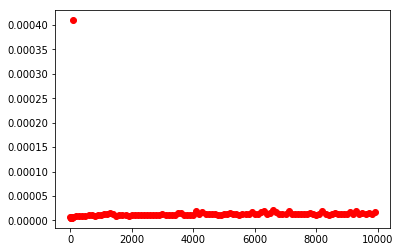

In [202]:
plt.plot(lengthes, avg_times, "ro")
plt.show()   

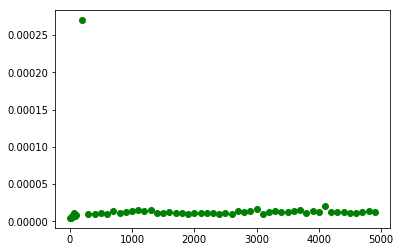

In [204]:
plt.plot(lengthes, avg_times, "go")
plt.show()   

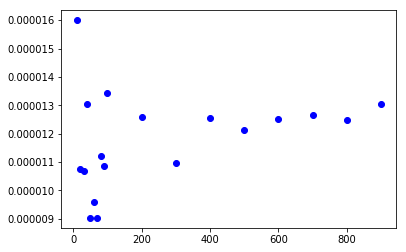

In [243]:
plt.plot(lengthes, avg_times, "bo")
plt.show() 

(1 балл) Напишите удаление элемента из случайного дерева поиска. Постройте распределение высот получаемых деревьев. 


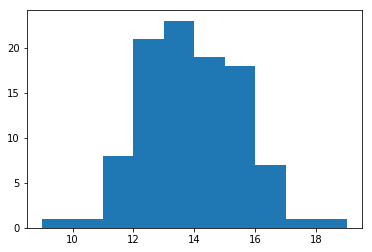

In [235]:
test = [[random.randint(1, 100) for i in range(500)] for n in range(100)] 
avg_height = []
for x in test:
    tree = Tree(x[0])
    for i in x:
        tree.add(i)
        
    avg_height.append(tree.height())

plt.hist(avg_height)
plt.show()

In [245]:
np.log2(500)

8.965784284662087

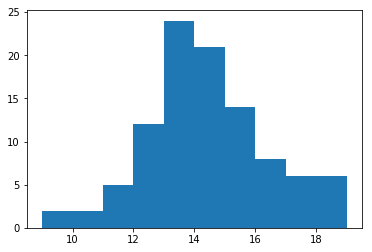

In [238]:

test = [[random.randint(1, 100) for i in range(500)] for n in range(100)] 
avg_height = []
for x in test:
    tree = Tree(x[0])
    for i in x:
        tree.add(i)
    tree.cut(x[len(x)-1])
    avg_height.append(tree.height())

plt.hist(avg_height)
plt.show()